In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


(512, 512, 3)


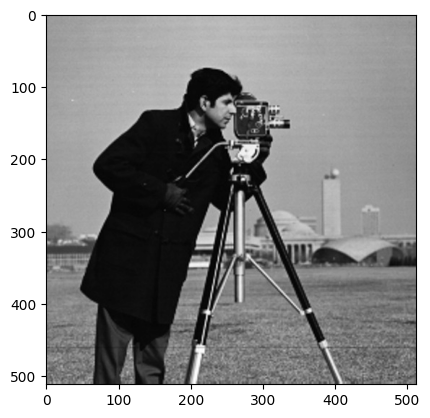

In [2]:
camera = cv.imread('camera.png')
plt.imshow(camera)
print(camera.shape)

In [3]:
camera.shape

(512, 512, 3)

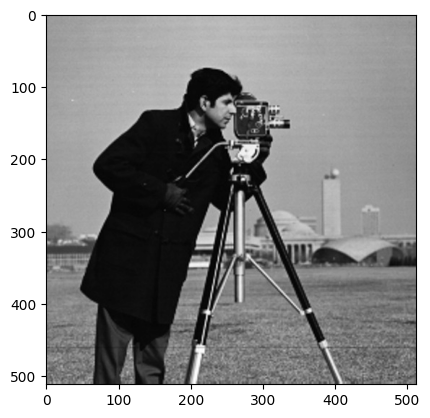

In [4]:
camera_rgb = cv.cvtColor(camera, cv.COLOR_BGR2RGB)
plt.imshow(camera_rgb)

In [5]:
print(camera_rgb.shape)

(512, 512, 3)


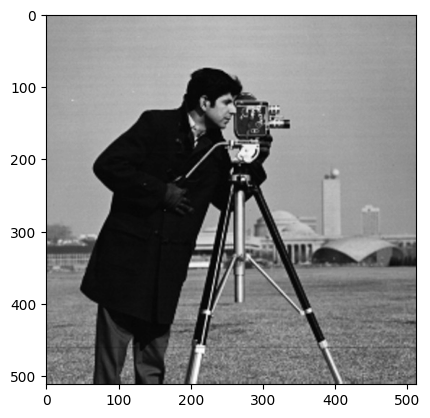

In [6]:
camera_gray = cv.cvtColor(camera_rgb, cv.COLOR_RGB2GRAY)
plt.imshow(camera_gray, cmap='gray')

In [7]:
camera_gray.shape

(512, 512)

In [8]:
def hist(img):
    h = np.zeros(512)
    for i in range(512):
        h[i] = sum(sum(img==i))
    return h

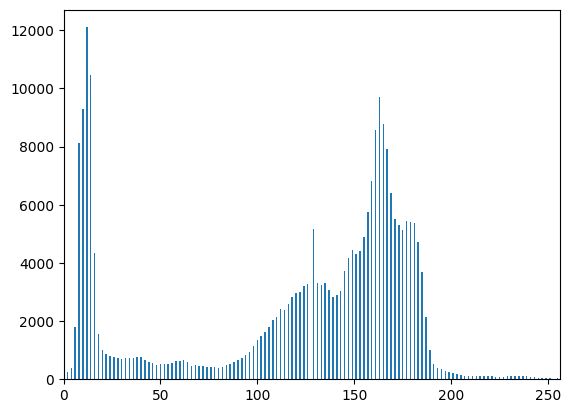

In [9]:
hist = hist(camera_gray)
plt.bar(np.arange(512), hist)
plt.xlim(0, 256)
plt.show()

In [25]:
def reduce_bit_depth(img, bits):
    # max_intensity = 2 ** bits - 1
    # return np.floor(img / (256 // (max_intensity + 1))) * (256 // (max_intensity + 1))
    bit_mask = 1 << bits  # Create a bit mask for the specified bit
    extracted_bit = (img & bit_mask) >> bits  # Extract and shift the bit to the least significant position
    return extracted_bit

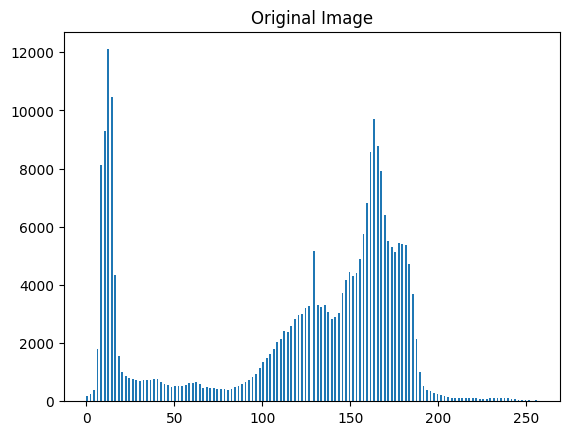

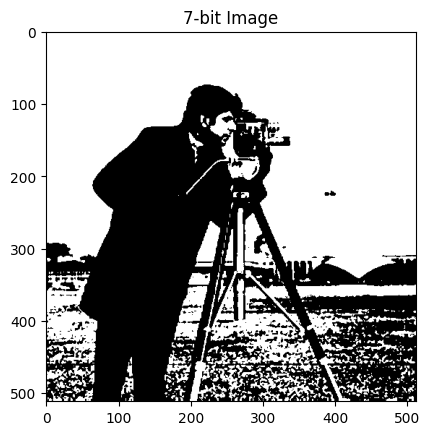

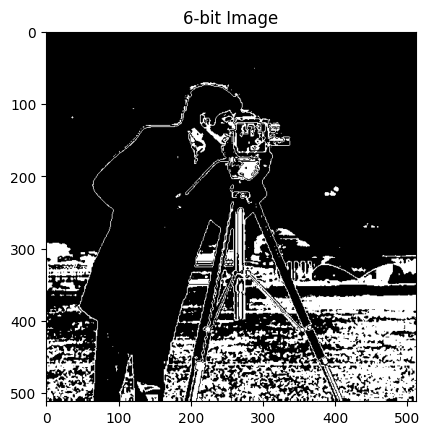

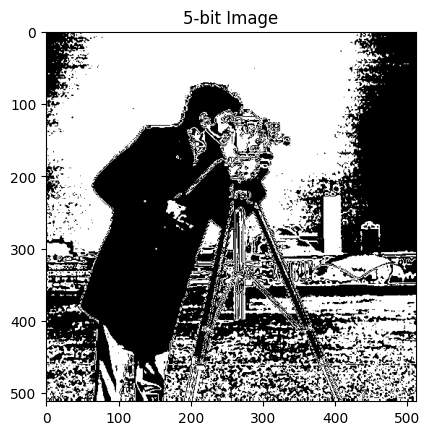

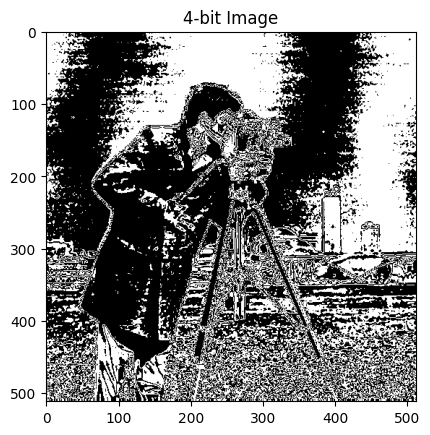

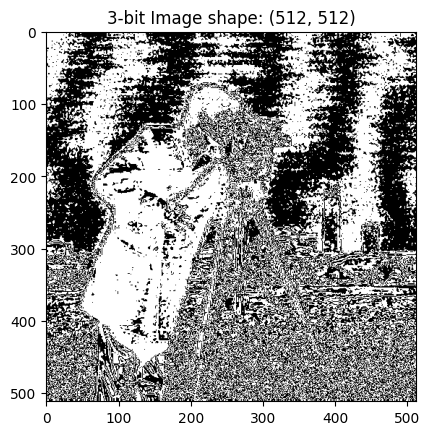

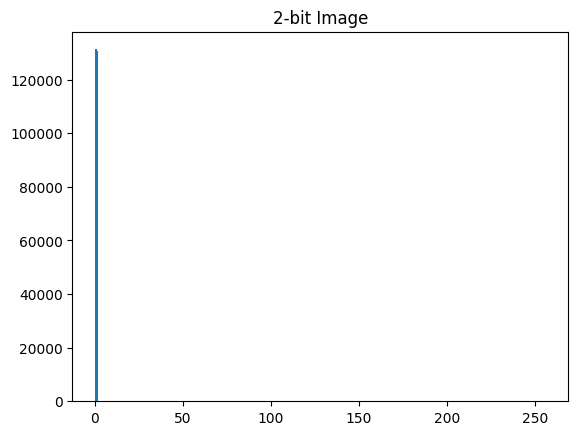

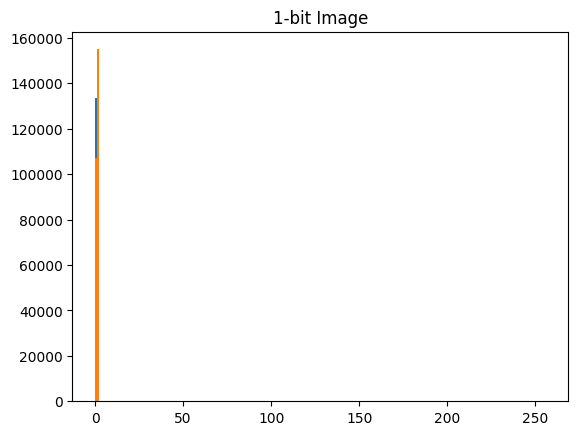

In [27]:
original_image = camera_gray
img_7bit = reduce_bit_depth(camera_gray, 7)
img_6bit = reduce_bit_depth(camera_gray, 6)
img_5bit = reduce_bit_depth(camera_gray, 5)
img_4bit = reduce_bit_depth(camera_gray, 4)
img_3bit = reduce_bit_depth(camera_gray, 3)
img_2bit = reduce_bit_depth(camera_gray, 2)
img_1bit = reduce_bit_depth(camera_gray, 1)
img_0bit = reduce_bit_depth(camera_gray, 0)


# plt.figure(figsize=(10, 10))

# plt.imshow(original_image, cmap='gray')
plt.hist(original_image.ravel(), bins=256, range=(0, 256))

plt.title("Original Image")
plt.show()

# plt.subplot(2, 1, 1)
plt.imshow(img_7bit, cmap='gray')
# plt.hist(img_7bit.ravel(), bins=256, range=(0, 256))

plt.title("7-bit Image")
plt.show()

# plt.subplot(7, 1, 2)
plt.imshow(img_6bit, cmap='gray')
plt.title("6-bit Image")
plt.show()

# plt.subplot(7, 1, 3)
plt.imshow(img_5bit, cmap='gray')
plt.title("5-bit Image")
plt.show()

# plt.subplot(7, 1, 4)
plt.imshow(img_4bit, cmap='gray')
plt.title("4-bit Image")
plt.show()

# plt.subplot(7, 1, 5)
plt.imshow(img_3bit, cmap='gray')
plt.title(f"3-bit Image shape: {img_3bit.shape}")
plt.show()

# plt.subplot(7, 1, 6)
# plt.imshow(img_2bit, cmap='gray')
plt.hist(img_2bit.ravel(), bins=256, range=(0, 256))
plt.title("2-bit Image")
plt.show()

# plt.subplot(7, 1, 7)
# plt.imshow(img_1bit, cmap='gray')
plt.hist(img_1bit.ravel(), bins=256, range=(0, 256))

plt.title("1-bit Image")

plt.hist(img_0bit.ravel(), bins=256, range=(0, 256))
plt.show()


In [12]:
def resize_bilinear(img, new_size):
    old_height, old_width = img.shape
    new_height, new_width = new_size

    fx = old_width / new_width
    fy = old_height / new_height

    resized_img = np.zeros((new_height, new_width), dtype=img.dtype)

    for y in range(new_height):
        for x in range(new_width):
            orig_x = x * fx
            orig_y = y * fy
            x0, y0 = int(orig_x), int(orig_y)
            x1, y1 = min(x0 + 1, old_width - 1), min(y0 + 1, old_height - 1)

            dx, dy = orig_x - x0, orig_y - y0
            top = (1 - dx) * img[y0, x0] + dx * img[y0, x1]
            bottom = (1 - dx) * img[y1, x0] + dx * img[y1, x1]
            resized_img[y, x] = (1 - dy) * top + dy * bottom

    return resized_img


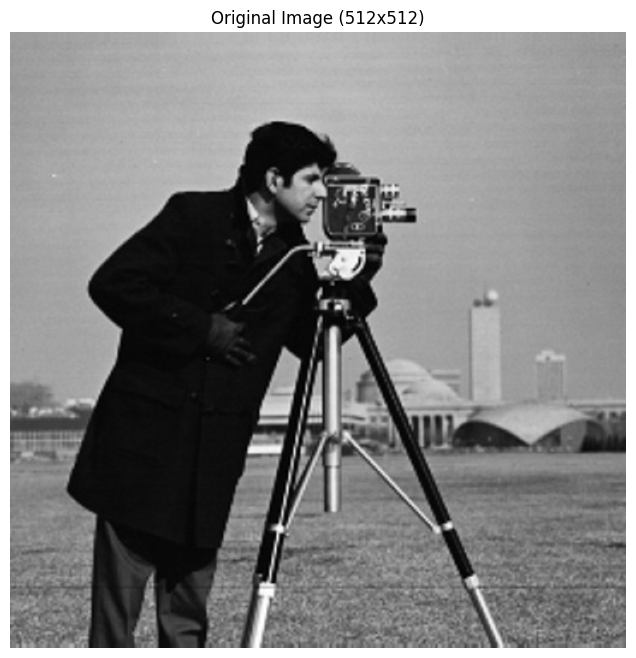

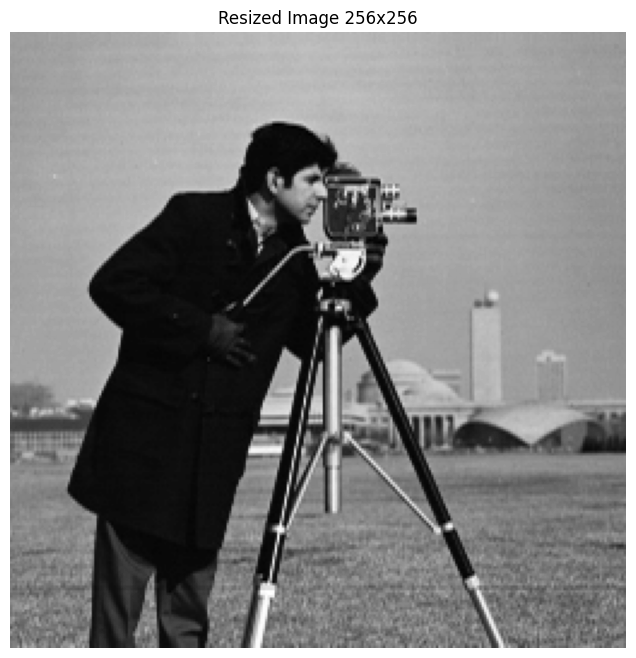

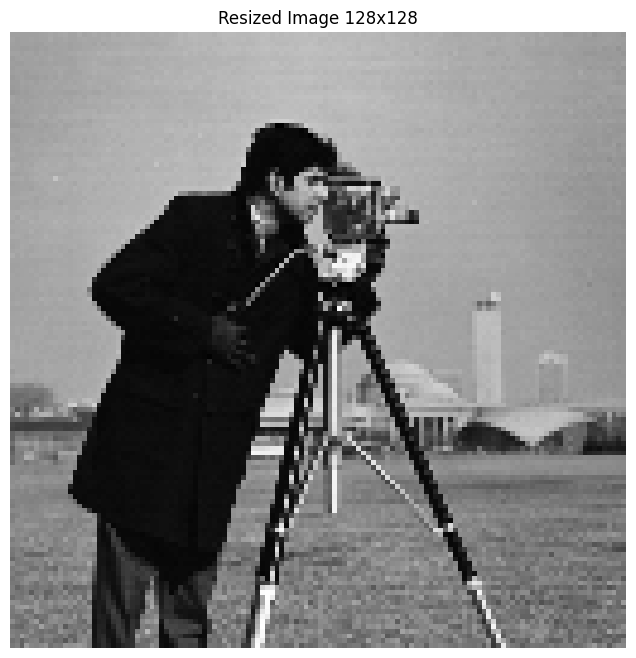

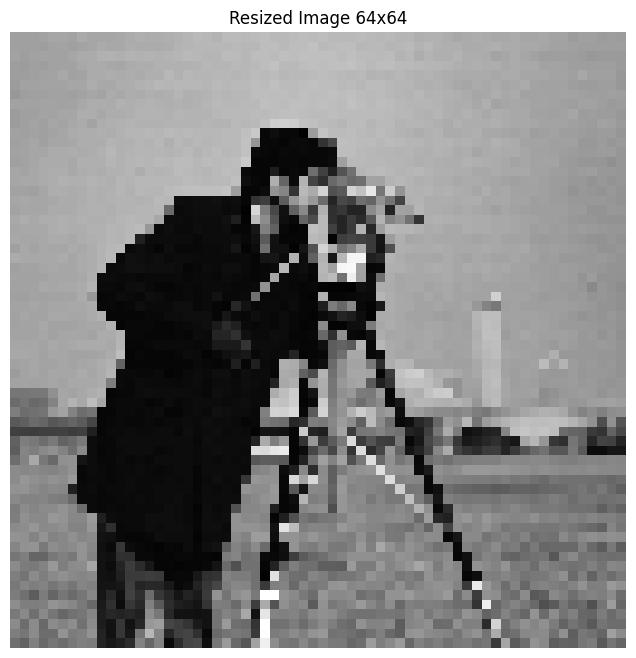

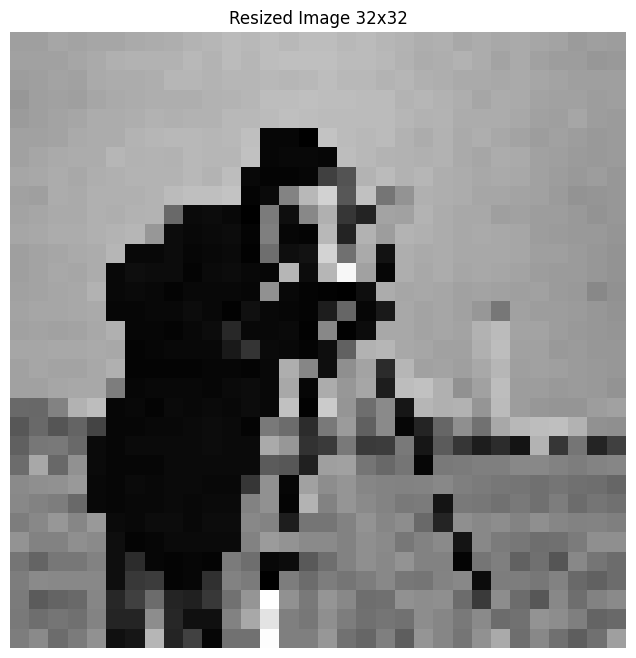

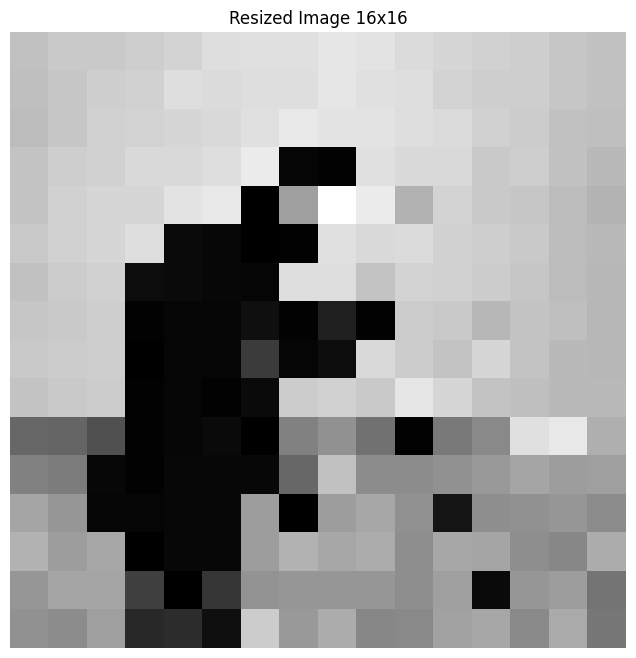

In [13]:
sizes = [(256, 256), (128, 128), (64, 64), (32, 32), (16, 16)]

plt.figure(figsize=(8, 8))
plt.imshow(camera_gray, cmap='gray')
plt.title('Original Image (512x512)')
plt.axis('off')  # Hide axes
plt.show()

for size in sizes:
    img = camera_gray
    resized_img = resize_bilinear(img, size)
    plt.figure(figsize=(8, 8))
    plt.imshow(resized_img, cmap='gray')
    plt.title(f'Resized Image {size[0]}x{size[1]}')
    plt.axis('off')
    plt.show()

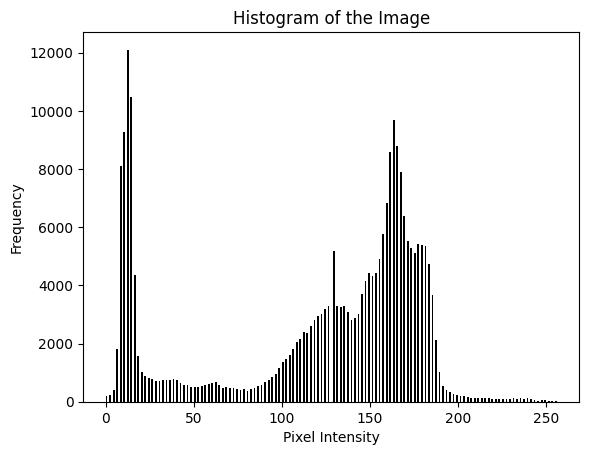

In [14]:
plt.hist(camera_gray.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


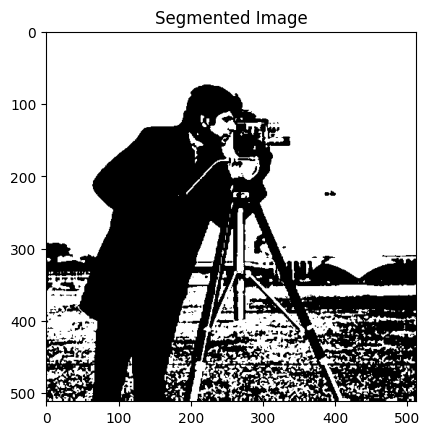

In [15]:
threshold_value = 128
_, segmented_image = cv.threshold(camera_gray, threshold_value, 255, cv.THRESH_BINARY)

plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.show()


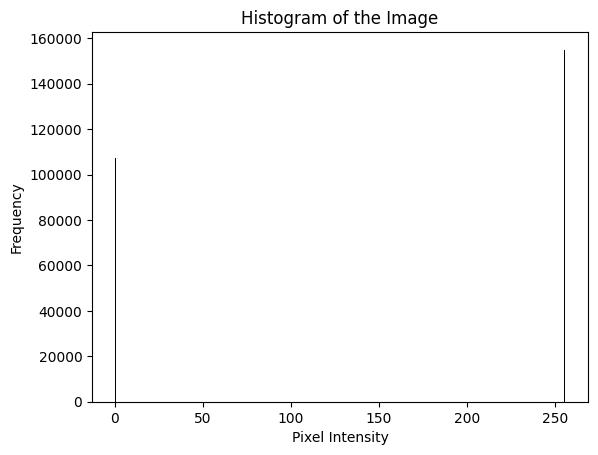

In [16]:
plt.hist(segmented_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

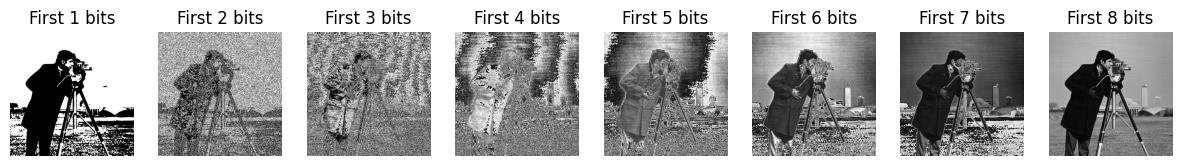

In [22]:
def reduce_bit_depth(img, bits):
    max_intensity = 2 ** bits - 1
    return np.floor(img / (256 // (max_intensity + 1))) * (256 // (max_intensity + 1))

def extract_bits(img, num_bits):
    bit_images = []
    for i in range(num_bits):
        bit_mask = 2 ** i
        bit_image = (img & bit_mask) > 0  
        bit_images.append(bit_image.astype(int))
    
    return bit_images

def combine_bits(bit_images):
    combined_images = []
    for i in range(1, len(bit_images) + 1):
        combined = np.zeros_like(bit_images[0])
        for j in range(i):
            combined += bit_images[j] * (2 ** j)
        combined_images.append(combined)
    return combined_images

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')  
    plt.show()

bit_images = extract_bits(camera_gray, 8)  
combined_images = combine_bits(bit_images)

titles = [f'First {i} bits' for i in range(1, len(combined_images) + 1)]

display_images(combined_images, titles)


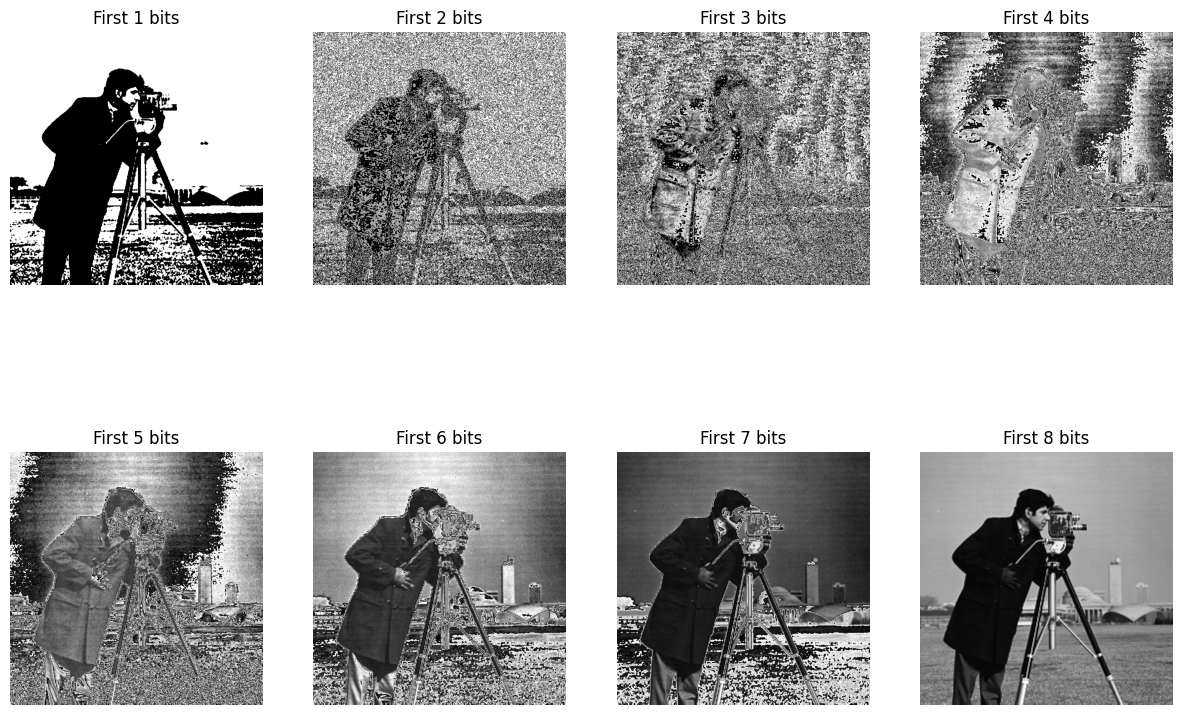

In [30]:
# Function to combine bits progressively: bit 0, bits 0+1, bits 0+1+2, ..., bits 0+1+...+7
def combine_bits_progressively(img):
    bit_images = [reduce_bit_depth(img, i) for i in range(8)]  # Extract all bits from 0 to 7
    combined_images = []
    
    for i in range(1, 9):  # Combine progressively: first 1 bit, first 2 bits, ..., first 8 bits
        combined = np.zeros_like(bit_images[0])  # Initialize combined image
        for j in range(i):  # Add bits from 0 to i-1
            combined += bit_images[j] * (2 ** j)
        combined_images.append(combined)
    
    return combined_images

# Assuming `camera_gray` is your grayscale image
# For illustration, we'll combine the bits from the image
combined_images = combine_bits_progressively(camera_gray)

# Display all the combined images in a single figure
def display_combined_images(images, titles):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # Arrange the images in 2 rows and 4 columns
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        # ax.hist(images[i].ravel(), bins=256, range=(0, 256), color='black')
        ax.set_title(titles[i])
        ax.axis('off')  # Hide axes for better visualization
    plt.show()

# Titles for each combination of bits
titles = [f"First {i} bits" for i in range(1, 9)]

# Display the combined bit images
display_combined_images(combined_images, titles)

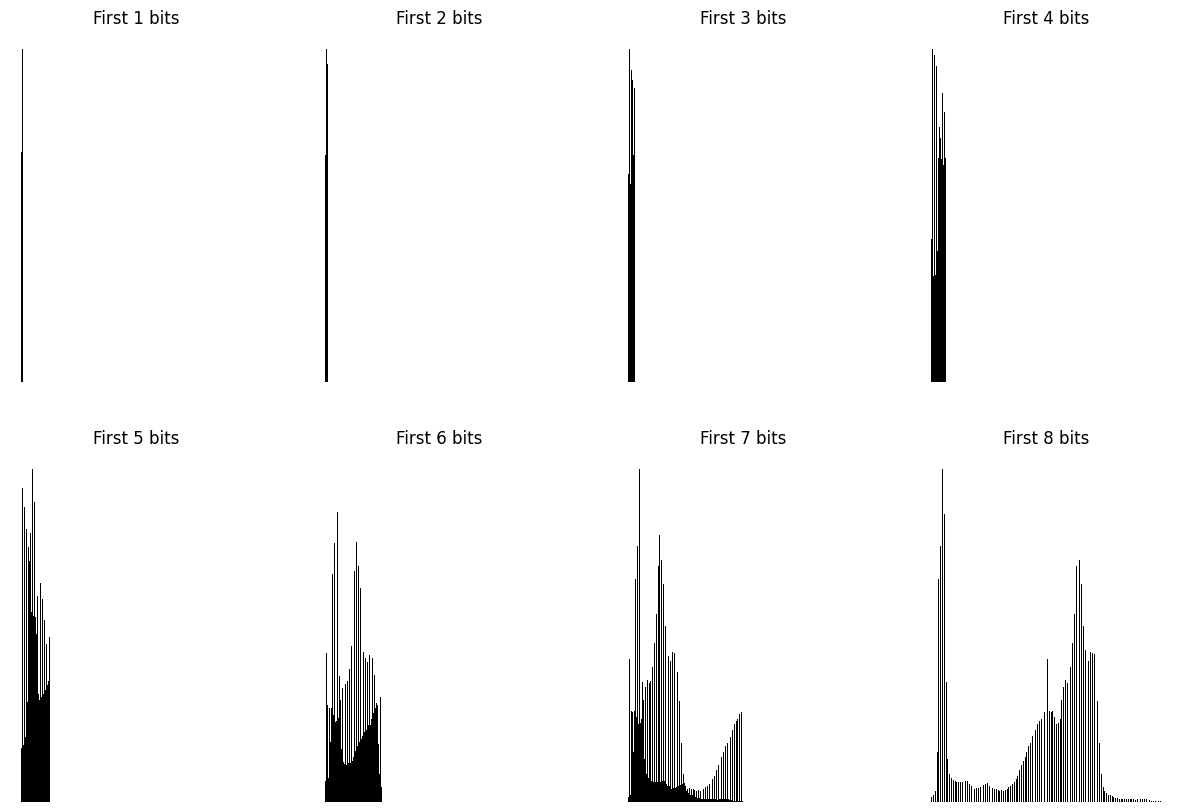

In [31]:
# Function to combine bits progressively: bit 0, bits 0+1, bits 0+1+2, ..., bits 0+1+...+7
def combine_bits_progressively(img):
    bit_images = [reduce_bit_depth(img, i) for i in range(8)]  # Extract all bits from 0 to 7
    combined_images = []
    
    for i in range(1, 9):  # Combine progressively: first 1 bit, first 2 bits, ..., first 8 bits
        combined = np.zeros_like(bit_images[0])  # Initialize combined image
        for j in range(i):  # Add bits from 0 to i-1
            combined += bit_images[j] * (2 ** j)
        combined_images.append(combined)
    
    return combined_images

# Assuming `camera_gray` is your grayscale image
# For illustration, we'll combine the bits from the image
combined_images = combine_bits_progressively(camera_gray)

# Display all the combined images in a single figure
def display_combined_images(images, titles):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # Arrange the images in 2 rows and 4 columns
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    
    for i, ax in enumerate(axes):
        # ax.imshow(images[i], cmap='gray')
        ax.hist(images[i].ravel(), bins=256, range=(0, 256), color='black')
        ax.set_title(titles[i])
        ax.axis('off')  # Hide axes for better visualization
    plt.show()

# Titles for each combination of bits
titles = [f"First {i} bits" for i in range(1, 9)]

# Display the combined bit images
display_combined_images(combined_images, titles)